In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from random import *

In [7]:
l=64
J=1
energyList=[]
magnetizationList=[]
listOfChanegedSpins=[]
tetaList=[0.01, 0.50 ,1.00, 1.50, 1.75, 2.00]

In [8]:
def InitialConfiguration():
    return np.ones((l,l))

def Magnetization(mylist):
    m=0
    for i in range(l):
        for j in range(l):
            m=m+mylist[i,j] 
    return m #/(l*l)

def ReverseSpinMagnetization(mylist,i,j):
    return 2*mylist[i,j]

def EnergyOfInitialConfiguration(mylist):
    for i in range(l):
        for j in range(l):
            e=(-J)*mylist[i][j]*(mylist[i][(j+1)%l]+mylist[(i+1)%l][j])
    return e

def ChangedSpinEnergy(myinput,i,j):
    ee=(-J)*2*myinput[i][j]*(myinput[i][(j+1)%l]+myinput[(i+1)%l][j]+myinput[i][(j-1)%l]+myinput[(i-1)%l][j])
    return ee

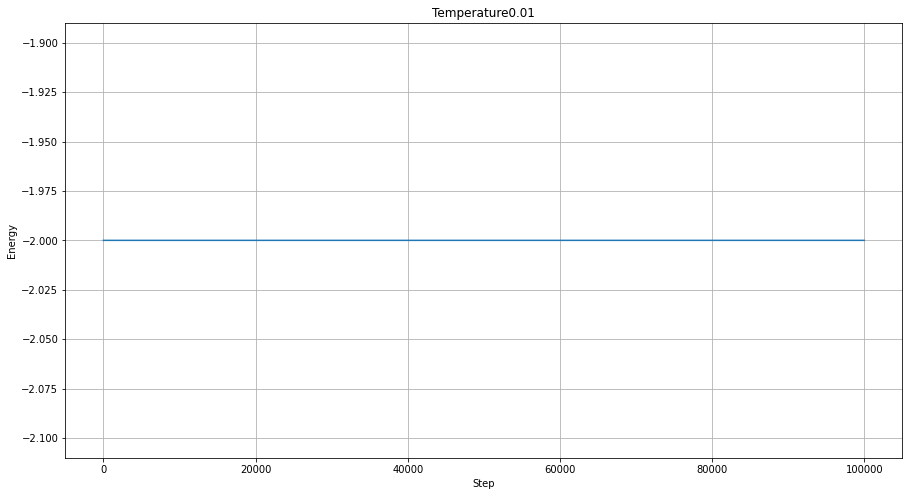

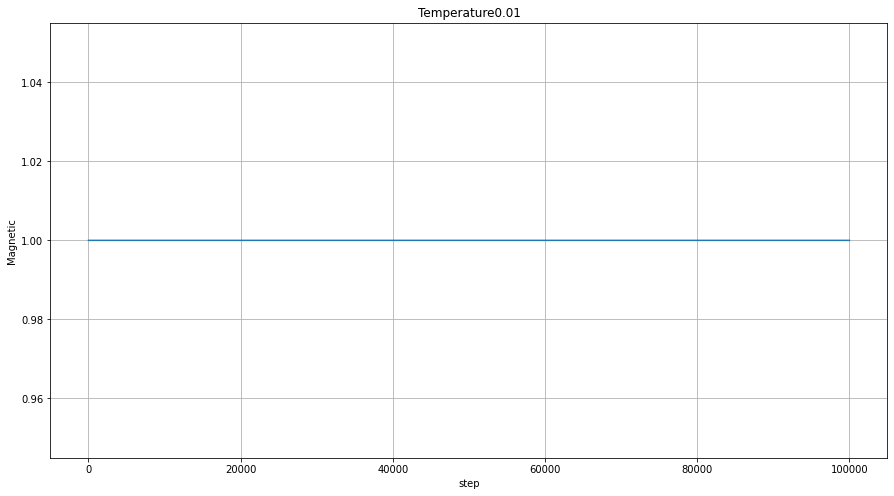

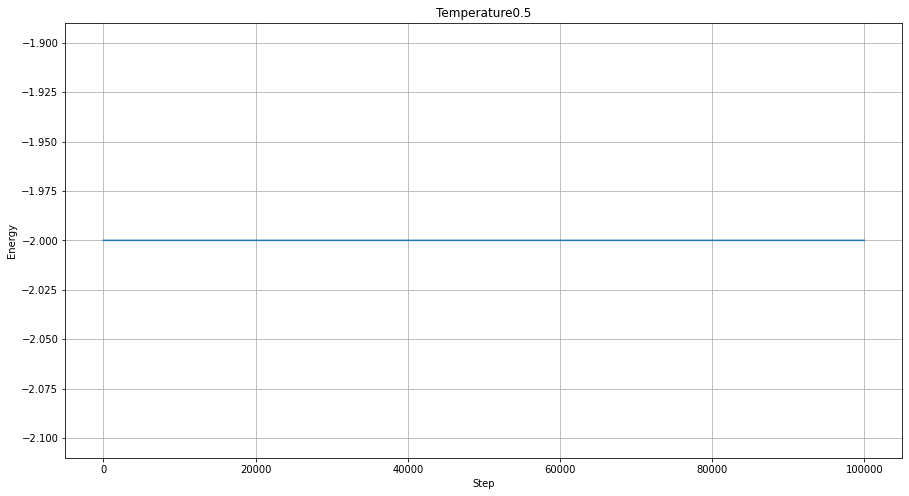

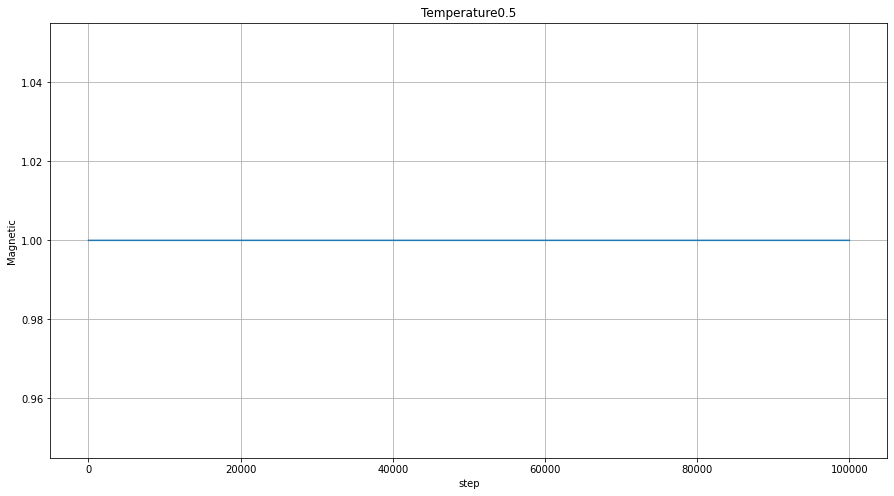

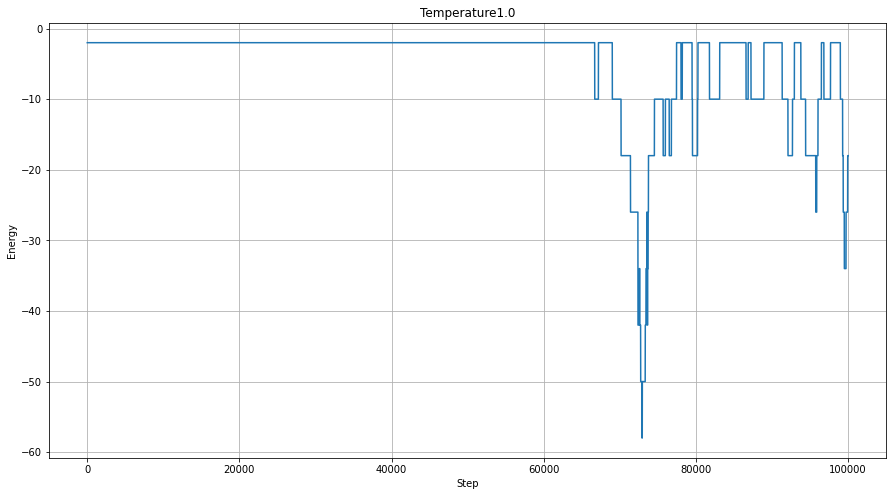

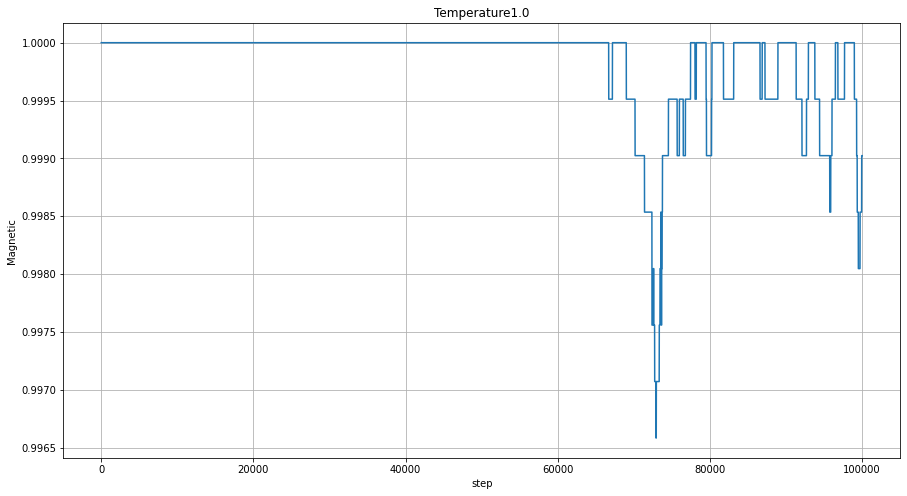

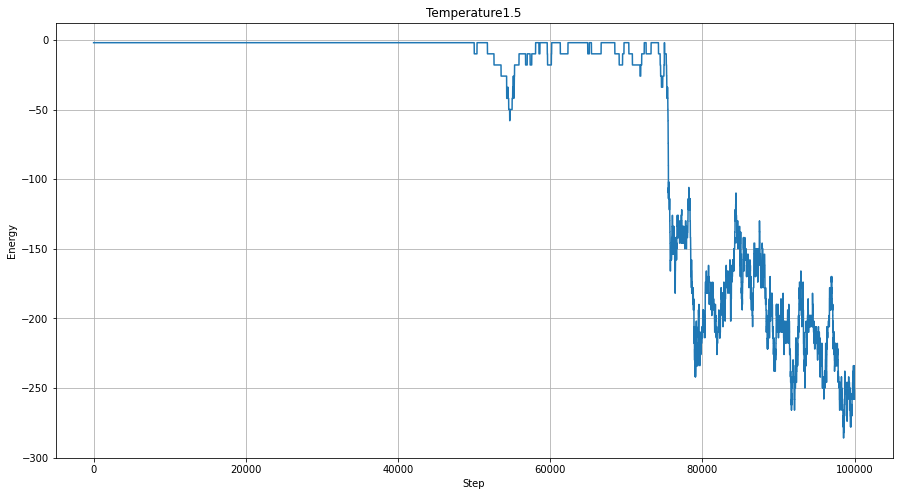

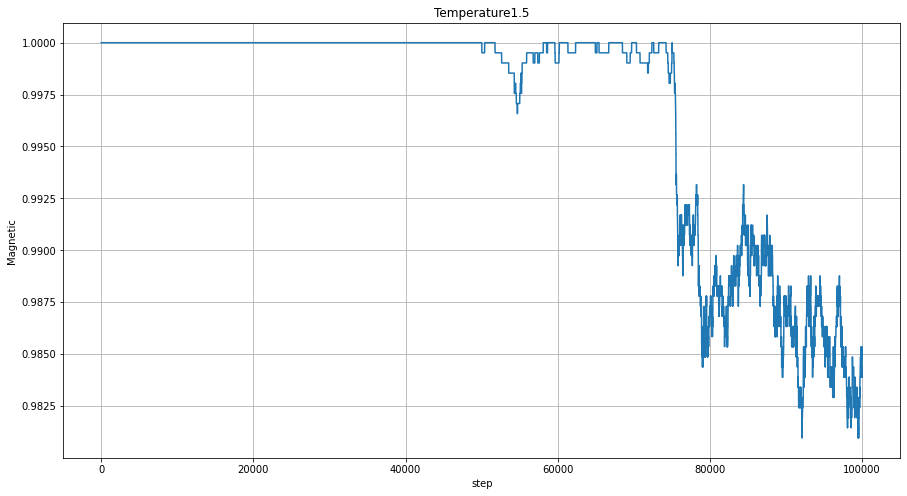

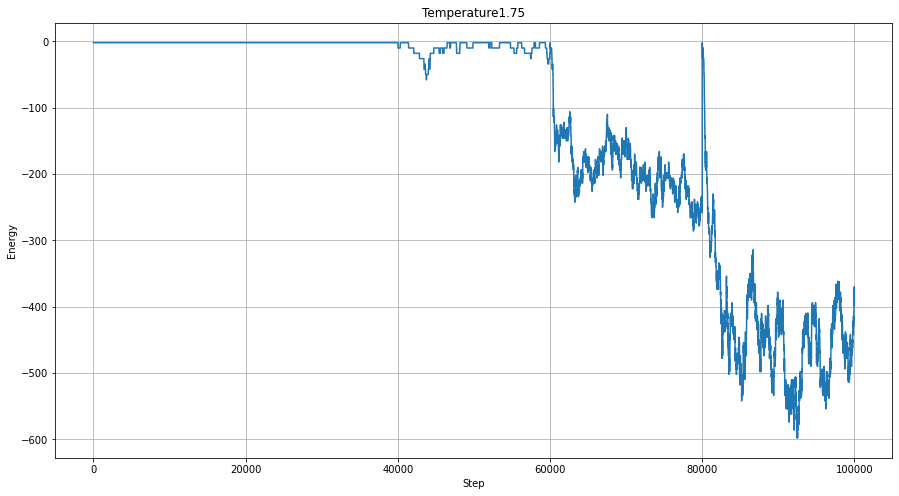

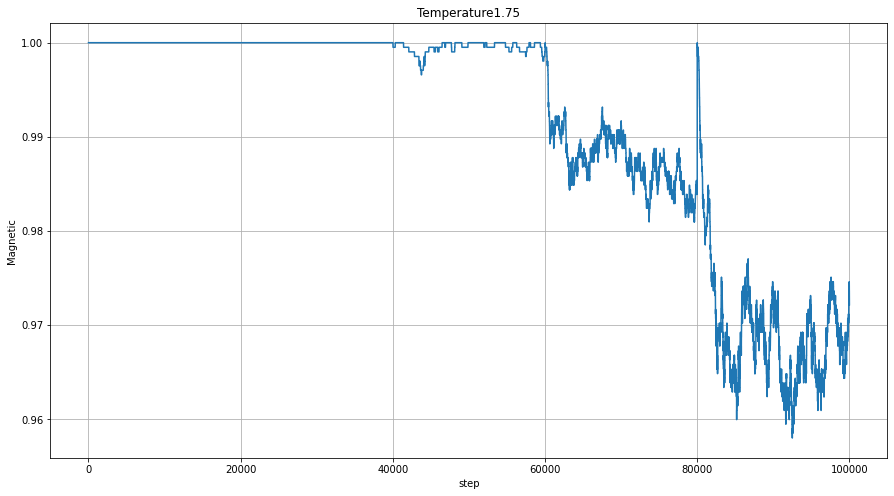

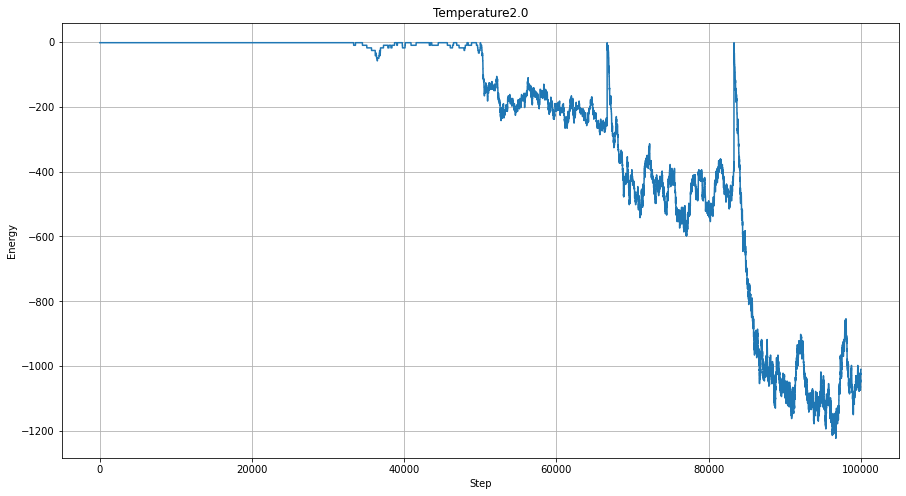

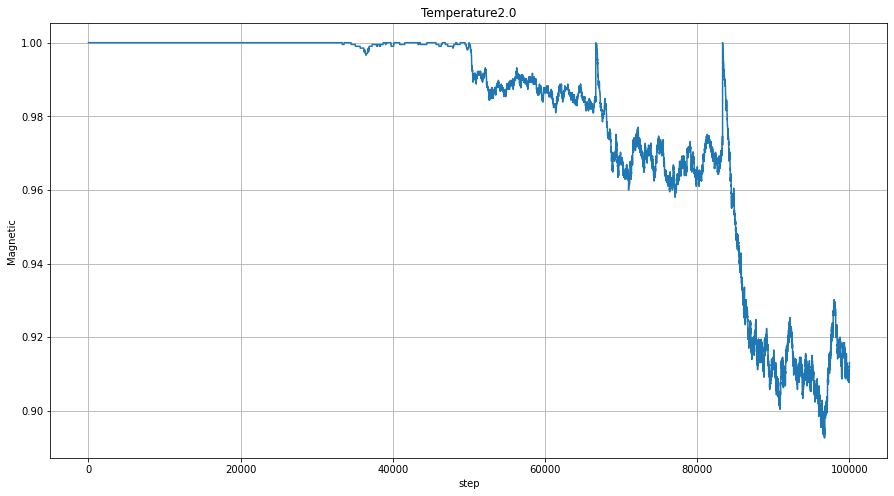

In [9]:
for t in tetaList:
    beta= 1/t
    stepNumber=100000
    configuration=InitialConfiguration()
    M=Magnetization(configuration)
    E=EnergyOfInitialConfiguration(configuration)

    for ii in range(stepNumber):
        rand=np.random.randint(0,l,2)
        rand1,rand2=rand[0],rand[1]
        configuration[rand1,rand2]= (-1)*(configuration[rand1,rand2])
        cSE=ChangedSpinEnergy(configuration,rand1,rand2)  
        rSM=ReverseSpinMagnetization(configuration,rand1,rand2)
        dltaE=E-cSE #energy of the new configuration
        if cSE<=0 or np.random.random()<= np.exp(-beta*cSE):
            E=dltaE
            M=M+(rSM) #changed_spin_list.append([rand1,rand2])
        else:
            configuration[rand1][rand2]= (-1)*(configuration[rand1][rand2])
        energyList.append(E)
        magnetizationList.append(M/(l*l))
        
    step=np.linspace(0,stepNumber,num=len(energyList))
    plt.figure(figsize=(15,8))
    plt.plot(step,energyList)
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.title('Temperature'+ str(t))
    plt.grid()
    plt.savefig('ETemperature'+ str(t)+'.png')
    
    step=np.linspace(0,stepNumber,num=len(magnetizationList))
    plt.figure(figsize=(15,8))
    plt.plot(step,magnetizationList)
    plt.xlabel('step')
    plt.ylabel('Magnetic')
    plt.title('Temperature'+ str(t))
    plt.grid()
    plt.savefig('MTemperature'+ str(t)+'.png')